# **Use YOLO-cls !**

노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO-cls 모델 만들기

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꾸기

- 1) 데이터셋을 불러오기
    - 데이터셋은 2가지. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리=.
    - UltraLytics YOLO-cls 모델에서 요구하는 데이터셋 폴더의 구조.
    - [UltraLytics YOLO-cls 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/classify/)

데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO-cls 모델**에 Transfer Learning을 수행.

- 1) UltraLytics YOLO-cls 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많음.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)
- 2) 선택한 UltraLytics YOLO-cls 모델로 학습을 진행.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO-cls 모델을 **반드시** 저장.
    - 모델을 **반드시** 저장.
    - .pt 형태로 Colab에 저장이 될 것. 해당 파일을 **로컬에 다운로드**

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project4 폴더를 만드세요.
        * 데이터 파일을 복사해 넣습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/project4'

### (2) 라이브러리 설치 및 불러오기

* 라이브러리 로딩

In [3]:
## colab에서 세션 재시작을 요구하는 팝업이 뜨면 재시작 누르세요.
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 55.5 MB/s eta 0:00:00


노트북에서 얼굴 인식 파일을 실행시키기 위해 **문제에 적합한** UltraLytics YOLO-cls 모델만들기.

그 전에 가지고 있는 데이터셋을 **학습에 적합한 형태**로 바꿔야 함.

- 1) 데이터셋을 불러오기.
    - 데이터셋은 2가지. 본인의 얼굴 이미지 파일, 다른 사람의 얼굴 이미지 파일.
- 2) 데이터셋을 전처리.
    - UltraLytics YOLO-cls 모델에서 요구하는 데이터셋 폴더의 구조가 있음.
    - [UltraLytics YOLO-cls 모델의 데이터셋 구조 링크](https://docs.ultralytics.com/datasets/classify/)

### (1) 데이터셋 불러오기

* **세부 요구사항**
    - 데이터셋을 불러오기
        - 데이터셋은 두 개의 압축 파일이어야 함.
            1. lfw-deepfunneled.zip : Labeled Faces in the Wild 데이터셋
                - 압축 파일을 로컬에 다운로드 받아서 **어떤 구조**인지 확인하세요.
            2. 조원 얼굴 이미지 데이터셋
                - 조원 얼굴 이미지가 담긴 **압축 파일**을 **Google Drive에 업로드** 하기를 권장.
                    - 이미지 파일 하나하나 업로드 하면 시간이 오래 걸림.
    - 데이터셋 압축 파일을 **Colab에 폴더를 생성한 후 해제**.
        - 데이터셋 폴더를 **본인 얼굴 폴더, LFW 폴더로 나누어** 생성하는 것을 권장.
        - 만일 두 압축 파일을 하나의 폴더에 모두 해제하면 전처리가 더 까다로워질 것.
    - 예시 코드에서 사용한 라이브러리
        - os, zipfile

In [4]:
import os
import zipfile

#### 1) 본인 얼굴 이미지 데이터셋 불러오기

In [5]:
data_myFace = os.path.join(path, './Keras/my_face_exam.zip')
data_myFace

'/content/drive/MyDrive/project4/./Keras/my_face_exam.zip'

In [6]:
## Colab에 생성할 본인 얼굴 폴더 경로
extract_folder = '/content/my_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_myFace, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [7]:
## 생성된 본인 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

3000

#### 2) 다른 얼굴 이미지 데이터셋 불러오기

In [8]:
data_other = path + '/Keras/lfw-deepfunneled.zip'
data_other

'/content/drive/MyDrive/project4/Keras/lfw-deepfunneled.zip'

In [9]:
## Colab에 생성할 다른 얼굴 폴더 경로
extract_folder = '/content/other_face'

## 위의 경로에 폴더가 없을 때 생성
if not os.path.exists(extract_folder) :
    os.makedirs(extract_folder)

## 위의 경로에 압축을 해제
with zipfile.ZipFile(data_other, 'r') as zip_ref :
    file_list = zip_ref.namelist()

    for f in file_list :
        if not f.endswith('/') and f.lower().endswith('.jpg') :
            file_name = os.path.basename(f)

            if not file_name.startswith('._') :
                d_path = os.path.join(extract_folder, file_name)

                with zip_ref.open(f) as source, open(d_path, 'wb') as target :
                    target.write(source.read())

In [10]:
## 생성된 다른 사람 얼굴 이미지 데이터 폴더 안의 이미지 수
len(os.listdir(extract_folder) )

13233

### (2) 데이터셋 전처리

* **세부 요구사항**
    - 데이터셋을 전처리 합니다.
        - YOLO-cls 모델이 요구하는 폴더 구조를 만듭니다.
            1. Datasets라는 폴더를 생성합니다.
            2. Training set, Validation set, Test set(선택 사항) 각 데이터셋이 들어갈 폴더를 생성합니다.
            3. 각 데이터셋 폴더에 분류할 클래스의 이름을 가진 폴더를 생성합니다.
        - 폴더 구조에 맞게 데이터를 분배합니다.
    - 예시 코드에서 사용한 라이브러리
        - os, glob, random, shutil, numpy

#### 1) 모델이 요하는 구조의 폴더 생성

#### 2) 각 폴더에 이미지 데이터 옮기기

In [11]:
import os
import glob
import random
import shutil
import numpy as np

# 기본 경로 설정
base_path = '/content'
my_face_path = os.path.join(base_path, 'my_face')
other_face_path = os.path.join(base_path, 'other_face')
dataset_path = os.path.join(base_path, 'Datasets')

# 데이터셋 폴더 구조 생성
folders = ['train', 'val', 'test']  # test는 선택 사항
classes = ['my_face', 'other_face']

for folder in folders:
    for cls in classes:
        os.makedirs(os.path.join(dataset_path, folder, cls), exist_ok=True)

# 데이터 분배 함수
def distribute_data(source_dir, dest_dir, class_name, num_images):
    images = glob.glob(os.path.join(source_dir, '*.jpg'))  # 이미지 확장자에 맞게 조정
    random.shuffle(images)  # 랜덤하게 섞기
    selected_images = images[:num_images]  # 선택할 이미지 수

    for img in selected_images:
        shutil.copy(img, os.path.join(dest_dir, class_name, os.path.basename(img)))

# 각 클래스에 대해 데이터 분배
num_my_face_train = int(0.7 * 3000)  # 70%를 train에
num_my_face_val = int(0.15 * 3000)    # 15%를 val에
num_my_face_test = 3000 - num_my_face_train - num_my_face_val  # 나머지 15%를 test에

num_other_face_train = int(0.7 * 13300)  # 70%를 train에
num_other_face_val = int(0.15 * 13300)    # 15%를 val에
num_other_face_test = 13300 - num_other_face_train - num_other_face_val  # 나머지 15%를 test에

# my_face 데이터 분배
distribute_data(my_face_path, os.path.join(dataset_path, 'train'), 'my_face', num_my_face_train)
distribute_data(my_face_path, os.path.join(dataset_path, 'val'), 'my_face', num_my_face_val)
distribute_data(my_face_path, os.path.join(dataset_path, 'test'), 'my_face', num_my_face_test)

# other_face 데이터 분배
distribute_data(other_face_path, os.path.join(dataset_path, 'train'), 'other_face', num_other_face_train)
distribute_data(other_face_path, os.path.join(dataset_path, 'val'), 'other_face', num_other_face_val)
distribute_data(other_face_path, os.path.join(dataset_path, 'test'), 'other_face', num_other_face_test)

print("데이터셋 전처리가 완료되었습니다.")


데이터셋 전처리가 완료되었습니다.


## 3.미션2

데이터셋의 폴더 구조를 **학습에 적합한 형태**로 만들었다면, **사전 학습된 UltraLytics YOLO-cls 모델**에 Transfer Learning을 수행합니다.

- 1) UltraLytics YOLO-cls 모델 선택
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)
- 2) 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)
- 3) 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/#inference-arguments)
- 4) 해당 UltraLytics YOLO-cls 모델을 **반드시** 저장합니다.
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

#### (1) UltraLytics YOLO-cls 모델 선택

* **세부 요구사항**
    - 세부 모델로 n, s, m, l, x가 있습니다. n가 가장 빠르고, x가 가장 연산량이 많습니다.
    - [UltraLytics YOLO-cls 모델 링크](https://docs.ultralytics.com/tasks/classify/)

#### (2) UltraLytics YOLO-cls 모델 학습

* **세부 요구사항**
    - 선택한 UltraLytics YOLO-cls 모델로 학습을 진행합니다.
    - [UltraLytics YOLO 학습 명령어 링크](https://docs.ultralytics.com/modes/train/#train-settings)

In [50]:
# pip install ultralytics


In [63]:
from ultralytics import YOLO

# 모델 로드 (예시로 YOLOv8s 클래시피케이션 모델 사용)
model = YOLO("yolo11l-cls.pt")

print("YOLO 모델이 성공적으로 로드되었습니다.")


100%|██████████| 27.2M/27.2M [00:00<00:00, 425MB/s]

YOLO 모델이 성공적으로 로드되었습니다.


In [33]:
import os

# 데이터셋 경로
train_path = '/content/Datasets/train'
val_path = '/content/Datasets/val'
test_path = '/content/Datasets/test'

# 경로 존재 여부 확인
print("Train path exists:", os.path.exists(train_path))
print("Val path exists:", os.path.exists(val_path))
print("Test path exists:", os.path.exists(test_path))

# 각 디렉토리 내 파일 목록 확인
if os.path.exists(train_path):
    print("Train files:", os.listdir(train_path))
if os.path.exists(val_path):
    print("Val files:", os.listdir(val_path))
if os.path.exists(test_path):
    print("Test files:", os.listdir(test_path))


Train path exists: True
Val path exists: True
Test path exists: True
Train files: ['my_face', 'other_face', 'my_face.cache']
Val files: ['my_face', 'other_face', 'my_face.cache']
Test files: ['my_face', 'other_face']


In [65]:

# YOLO 클래스 모델 로드
# model = YOLO("yolo11n-cls.pt")
model = YOLO("yolo11l-cls.pt")

# 모델 학습
results = model.train(
    data="/content/Datasets/",  # 데이터셋 경로
    epochs=25,        # 학습할 에폭 수
    imgsz=160,         # 입력 이미지 크기
)

# 학습 결과 출력
print(results)

Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=classify, mode=train, model=yolo11l-cls.pt, data=/content/Datasets/, epochs=25, time=None, patience=100, batch=16, imgsz=160, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

train: Scanning /content/Datasets/train... 11410 images, 0 corrupt: 100%|██████████| 11410/11410 [00:00<?, ?it/s]
val: Scanning /content/Datasets/val... 2445 images, 0 corrupt: 100%|██████████| 2445/2445 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 160 train, 160 val
Using 8 dataloader workers
Logging results to runs/classify/train3
Starting training for 25 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:02<00:00, 37.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 42.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.29it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 43.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 42.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.61it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:02<00:00, 37.89it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 43.65it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      10/25     0.956G  0.0009254          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 43.27it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      11/25     0.956G  0.0005078          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      12/25     0.973G    0.00187          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      13/25     0.956G   0.001139          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 42.92it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      14/25     0.956G    0.00164          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 43.21it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      15/25      0.96G  0.0001883          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.61it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      16/25      0.96G  0.0001899          2        160: 100%|██████████| 714/714 [00:54<00:00, 13.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 41.19it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      17/25     0.958G  0.0003938          2        160: 100%|██████████| 714/714 [00:54<00:00, 13.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 42.27it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      18/25     0.958G  8.001e-05          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 41.60it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      19/25     0.958G  0.0001862          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:02<00:00, 38.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      20/25     0.958G  3.151e-05          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 42.56it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      21/25     0.958G   0.001139          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 42.16it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      22/25     0.958G  0.0008885          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 40.68it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      23/25     0.954G  0.0001958          2        160: 100%|██████████| 714/714 [00:54<00:00, 13.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 39.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      24/25     0.971G  0.0002481          2        160: 100%|██████████| 714/714 [00:54<00:00, 13.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 43.75it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      25/25     0.971G  0.0005824          2        160: 100%|██████████| 714/714 [00:53<00:00, 13.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 43.65it/s]

                   all          1          1



25 epochs completed in 0.398 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 25.9MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 25.9MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11l-cls summary (fused): 227 layers, 12,820,994 parameters, 0 gradients, 49.3 GFLOPs
train: /content/Datasets/train... found 11410 images in 2 classes ✅ 
val: /content/Datasets/val... found 2445 images in 2 classes ✅ 
test: /content/Datasets/test... found 2445 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 77/77 [00:01<00:00, 50.31it/s]


                   all          1          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7af10d3339a0>
curves: []
curves_results: []
fitness: 1.0
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 1.0, 'metrics/accuracy_top5': 1.0, 'fitness': 1.0}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.03202619728135185, 'inference': 0.5381139509516991, 'loss': 0.00043168877287632604, 'postprocess': 0.0004707913701032081}
task: 'classify'
top1: 1.0
top5: 1.0


#### (3) UltraLytics YOLO-cls 추론

* **세부 요구사항**
    - 학습이 완료되면 추론을 진행합니다.
    - [UltraLytics YOLO 추론 명령어 링크](https://docs.ultralytics.com/modes/predict/)


0: 64x64 other_face 1.00, my_face 0.00, 6.6ms
Speed: 3.1ms preprocess, 6.6ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Original Shape: (250, 250)
Image Path: image0.jpg
Processing Speed: {'preprocess': 3.114461898803711, 'inference': 6.562709808349609, 'postprocess': 0.13303756713867188}
Probability data is not in expected format.


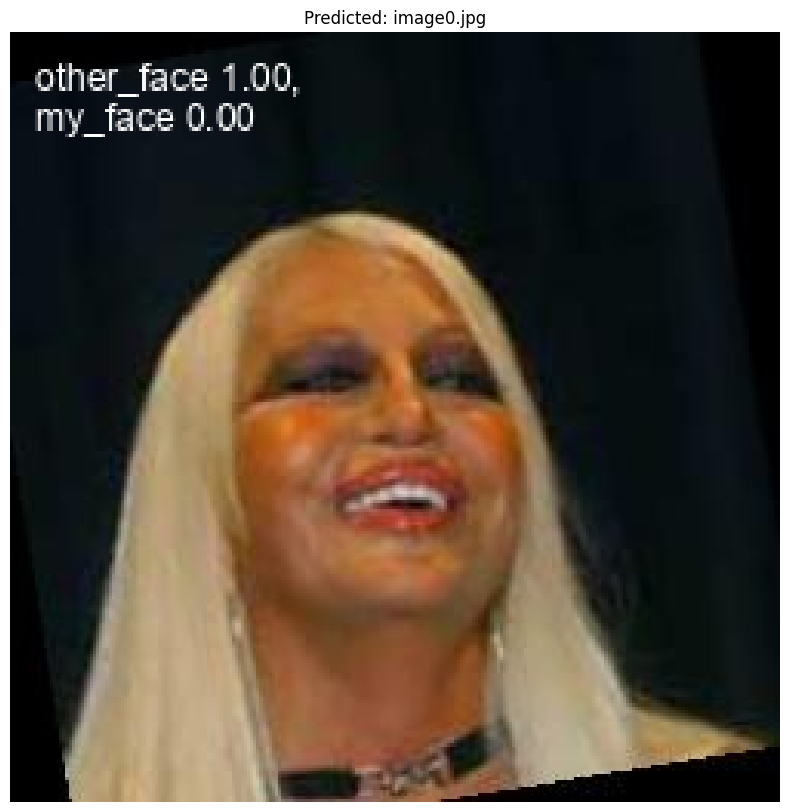

In [66]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# YOLO 모델 로드 (훈련 후 저장된 모델 사용)
model = YOLO("runs/classify/train/weights/best.pt")

# 이미지가 있는 폴더 경로 설정
my_face_dir = "/content/my_face"  # my_face 폴더 경로
other_face_dir = "/content/other_face"  # other_face 폴더 경로

# 두 개의 폴더에서 이미지 파일 리스트 가져오기
my_face_images = [os.path.join(my_face_dir, f) for f in os.listdir(my_face_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
other_face_images = [os.path.join(other_face_dir, f) for f in os.listdir(other_face_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 모든 이미지 리스트 결합
all_images = my_face_images + other_face_images

# 랜덤으로 이미지 선택
random_image_path = random.choice(all_images)

# 이미지 읽기
image = cv2.imread(random_image_path)

# 이미지가 제대로 읽혔는지 확인
if image is None:
    print(f"Error: Unable to read image at {random_image_path}. Please check the file path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 포맷으로 이미지를 읽기 때문에 RGB로 변환

    # 이미지 추론
    results = model.predict(image)

    # 결과 출력
    for result in results:
        print("Original Shape:", result.orig_shape)  # 원본 이미지 크기
        print("Image Path:", result.path)  # 이미지 경로
        print("Processing Speed:", result.speed)  # 처리 속도

        # 확률 확인
        if hasattr(result, 'probs') and result.probs is not None:
            # result.probs가 리스트인지 확인
            if isinstance(result.probs, list):
                for class_id, prob in enumerate(result.probs):
                    print(f"Class ID: {class_id}, Probability: {prob:.4f}")
            else:
                print("Probability data is not in expected format.")
        else:
            print("No probability data available.")

        # 결과 시각화
        plt.figure(figsize=(10, 10))
        plt.imshow(result.plot())  # 예측 결과 시각화
        plt.axis('off')
        plt.title(f'Predicted: {result.path}')
        plt.show()


#### (4) UltraLytics YOLO-cls 모델 저장

* **세부 요구사항**
    - 모델을 **반드시** 저장하세요.
    - .pt 형태로 Colab에 저장이 될 것입니다. 해당 파일을 **로컬에 다운로드** 하세요.

In [67]:
model.save("./yolo_cls_model_large.pt")

In [70]:
## Colab에 저장된 모델을 불러와 확인
model = YOLO("./yolo_cls_model_large.pt")

# 모델 구조 확인 (옵션)
print(model)

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
import glob
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# 이미지 파일 경로 리스트
img_fp_list = glob.glob('/content/Datasets/test/*/*.jpg')

# 모델 예측
pred = model(img_fp_list)

# 예측 확률 추출
pred_ = np.array([p_.probs.data.detach().cpu().numpy() for p_ in pred])

# 실제 레이블 생성
y_real = [0 if fp.split('/')[-2] == 'my_face' else 1 for fp in img_fp_list]
print(f"y_real: {y_real}")  # y_real 확인

# 예측 레이블 생성
y_pred = np.argmax(pred_, axis=1)
print(f"y_pred: {y_pred}")  # y_pred 확인

# 길이 확인
print(f"Length of y_real: {len(y_real)}")
print(f"Length of y_pred: {len(y_pred)}")

# 정확한 길이인지 확인
if len(y_real) == len(y_pred):
    print(classification_report(y_real, y_pred))
    print(confusion_matrix(y_real, y_pred))
else:
    print("Error: Lengths of y_real and y_pred do not match.")

# 예측 확률 출력 (클래스별)
for i in range(len(pred_)):
    class_0_prob = pred_[i][0]  # 클래스 0 (my_face) 확률
    class_1_prob = pred_[i][1]  # 클래스 1 (other_face) 확률
    print(f"Image: {img_fp_list[i]}, My Face Probability: {class_0_prob:.4f}, Other Face Probability: {class_1_prob:.4f}")




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 64x64 my_face 1.00, other_face 0.00, 0.0ms
1: 64x64 my_face 1.00, other_face 0.00, 0.0ms
2: 64x64 my_face 1.00, other_face 0.00, 0.0ms
3: 64x64 my_face 1.00, other_face 0.00, 0.0ms
4: 64x64 my_face 1.00, other_face 0.00, 0.0ms
5: 64x64 my_face 1.00, other_face 0.00, 0.0ms
6: 64x64 my_face 1.00, other_face 0.00, 0.0ms
7: 64x64 my_face 1.00, other_face 0.00, 0.0ms
8: 64x64 my_face 1.00, other_face 0.00, 0.0ms
9: 64x64 my_face 1.00, other_face 0.00, 0.

In [69]:
    print(classification_report(y_real, y_pred))
    print(confusion_matrix(y_real, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       450
           1       1.00      1.00      1.00      1995

    accuracy                           1.00      2445
   macro avg       1.00      1.00      1.00      2445
weighted avg       1.00      1.00      1.00      2445

[[ 450    0]
 [   0 1995]]
